ctps
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
ctps
tensor([[ 0.0000,  0.0000],
        [ 1.0000,  0.3898],
        [ 2.5000, -0.8224],
        [ 4.0000, -0.2876],
        [ 5.0000,  0.0000]])
class_scores
tensor([ 5, -3, -2,  3,  0, -8, -7, -2, -2, -5])
target_cls
tensor([5, 2, 7, 4, 1, 5, 2, 5, 2, 4, 2, 7, 3, 0, 1, 2, 8, 6, 8, 5])
target_scores
tensor([-8, -2, -2,  0, -3, -8, -2, -8, -2,  0, -2, -2,  3,  5, -3, -2, -2, -7,
        -2, -8])
traj
tensor([[ 0.0000e+00,  0.0000e+00],
        [ 6.0302e-02,  2.2418e-02],
        [ 1.2000e-01,  4.2468e-02],
        [ 1.7912e-01,  6.0221e-02],
        [ 2.3766e-01,  7.5748e-02],
        [ 2.9564e-01,  8.9120e-02],
        [ 3.5306e-01,  1.0041e-01],
        [ 4.0995e-01,  1.0968e-01],
        [ 4.6631e-01,  1.1701e-01],
        [ 5.2216e-01,  1.2247e-01],
        [ 5.7751e-01,  1.2613e-01],
        [ 6.3237e-01,  1.2806e-01],
        [ 6.8676e-01,  1.2833e-01],
        [ 7.4068e-01,  1.2701e-0

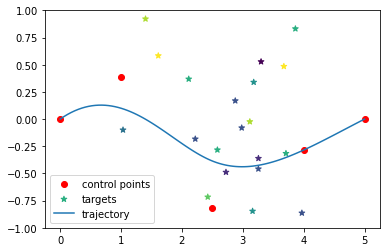

In [2]:
import torch
import matplotlib.pyplot as plt
from src import splev, evaluate
from agent import Agent,BlobModel
P = 3
N_CTPS = 5
N_TARGETS = 20
N_CLASSES = 10
RADIUS = 0.3

# To understand what a trajectory looks like,
# let's generate a B-Spline of degree P with N control points from (0,0) to (N_CTPS,0).
# Note that a (clamped) B-Spline passes through its first and last control points.

t = torch.linspace(0, N_CTPS-P, 100)
agent = Agent()
knots = torch.cat([
    torch.zeros(P), 
    torch.arange(N_CTPS+1-P), 
    torch.full((P,), N_CTPS-P),
])
ctps = torch.zeros(N_CTPS, 2)
print("ctps")
print(ctps)
ctps[0] = torch.tensor([0., 0.])
ctps[1:-1, 0] = torch.linspace(1, N_CTPS-1, N_CTPS-2)
ctps[1:-1, 1].uniform_(-1, 1)
ctps[-1] = torch.tensor([N_CTPS, 0.])
print("ctps")
print(ctps)
traj = splev(t, knots, ctps, P)

# Generate N_TARGETS targets
# essentially the same as `generate_game` function provided
#0-9每一类的分数
class_scores = torch.randint(-N_CLASSES, N_CLASSES, (N_CLASSES,))
print("class_scores")
print(class_scores)
target_pos = torch.rand((N_TARGETS, 2)) * torch.tensor([N_CTPS-2, 2.]) + torch.tensor([1., -1.])
#生成N_TARGETS个属于0-9类的点
target_cls = torch.randint(0, N_CLASSES, (N_TARGETS,))
print("target_cls")
print(target_cls)
#每一个点基于它的类别得到自己的分数
target_scores = class_scores[target_cls]
print("target_scores")
print(target_scores)
plt.scatter(*ctps.T, color="red", label="control points")
plt.scatter(*target_pos.T, c=target_cls, marker="*", label="targets")
plt.plot(*traj.T, label="trajectory")
plt.ylim(-1, 1)
plt.legend()

# evaluate the trajectory by checking which targets does it hit
# your goal is to choose ctps[1:-1] so that the score is maximized
print("traj")
print(traj)
print("target_pos")
print(target_pos)

print("RADIUS")
print(RADIUS)
score = evaluate(traj, target_pos, target_scores, RADIUS)
print("score")
print(score)